<a href="https://colab.research.google.com/github/kritika966/cross-functional-colab-python-r-tutorial/blob/main/Copy_of_Cross_Functional_Collaboration_Python_R_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Combining R and Python Code in Google Colab**

### **Introduction**

In this notebook, we will explore how to combine Python and R code in a single Google Colab notebook. For teams working across languages, Google Colab supports both Python and R within the same notebook. This is useful for collaboration, merging code, leveraging libraries, and showcasing skills in both languages.

Python is widely used for data preprocessing and machine learning, R is known for its powerful statistical analysis and visualization capabilities. Combining both allows us to leverage the best of both languages.

### Why Combine Python and R?
1. Collaborate easily in cross-functional teams (Python & R users)
2. Use Python’s rich ecosystem for machine learning and data manipulation
3. Use R’s statistical packages and advanced visualization libraries (like ggplot2)
4. Perform analysis efficiently without switching tools or platforms

### What You’ll Learn
1. How to run R code inside a Python-based Colab notebook
2. How to share data between Python and R
3. How to load, explore, and visualize the Home Credit dataset
4. Best practices for writing collaborative, cross-language notebooks


#  Setting up the Environment



## Creating a New Colab Notebook
1. Access Google Colab: Navigate to [Google Colab]( https://colab.research.google.com).
2. Create a New Notebook: Click on File > New Notebook.

## Configuring the Runtime for R

By default, Colab uses a Python runtime.

**To use R:**

1. Change Runtime Type:

 *   Go to Runtime > Change runtime type.
 *   In the Runtime type dropdown, select R.
 *   Click Save.

Alternatively, to use both R and Python in the same notebook:


1.   **Keep the Python Runtime:** Ensure the runtime is set to Python.
2.   **Enable R Magic Commands**



This command enables R support inside this Python notebook.


In [ ]:
%load_ext rpy2.ipython

## **Install R Environment** (Optional)

Most Colab environments have R pre-installed.




In [ ]:
!apt-get install -y r-base

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.3-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


# Combining R and Python in a Single Notebook

## Upload Dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving application_train.csv to application_train.csv


## Load and Explore data in Python

In [ ]:
import pandas as pd
df_py = pd.read_csv('application_train.csv')
df_py.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
missing = df_py.isnull().sum().sort_values(ascending=False)
print(missing.head())

COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
dtype: int64


In [ ]:
print(df_py['AMT_INCOME_TOTAL'].describe())

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


## Load and Explore data using R

In [ ]:
# `%%R` magic runs an entire cell as R code.
%%R
library(readr)
library(dplyr)

r_data <- read_csv('application_train.csv')
print(dim(r_data))
summary(r_data$AMT_INCOME_TOTAL)


Rows: 307511 Columns: 122
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (16): NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, N...
dbl (106): SK_ID_CURR, TARGET, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, A...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
[1] 307511    122
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    25650    112500    147150    168798    202500 117000000 



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Concept of Data Sharing in Colab

One of the most powerful features of Google Colab is the ability to run both Python and R code in the same notebook and share data between the two — without creating or saving files like CSVs.

This is made possible by the rpy2 extension, which acts like a bridge connecting Python and R within the same environment.

**Why is rpy2 Important?**


1. Seamless data transfer between Python and R without writing to disk.
2. Fast and memory-efficient, especially when working with large datasets like the Home Credit Default Risk dataset.
1. Eliminates the need for exporting Python data to CSV and then reading it back in R (or vice versa).
2. Supports real-time collaboration: Python developers and R statisticians can work in one shared notebook.

## Python Creates Data - R uses it

In [ ]:
import pandas as pd
# Create a Python dataframe and pass this dataframe to R
df_py_share = df_py[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE',
                   'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                   'AMT_ANNUITY', 'NAME_INCOME_TYPE']].dropna().head(50)

# Preview data
df_py_share.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE
0,100002,1,Cash loans,202500.0,406597.5,24700.5,Working
1,100003,0,Cash loans,270000.0,1293502.5,35698.5,State servant
2,100004,0,Revolving loans,67500.0,135000.0,6750.0,Working
3,100006,0,Cash loans,135000.0,312682.5,29686.5,Working
4,100007,0,Cash loans,121500.0,513000.0,21865.5,Working


## Share the Dataframe with R

In [ ]:
# Pass the dataframe to R
# %R -i varname passes a Python variable to R.
%R -i df_py_share

## Use the data inside R

In [ ]:
%%R
# View the data received from Python using R functions
head(df_py_share)

# Perform summary statistics in R
summary(df_py_share$AMT_CREDIT)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  80865  274718  503561  594703  766830 1560726 


In [ ]:
%%R
# Perform summary statistics in R
summary(df_py_share$AMT_CREDIT)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  80865  274718  503561  594703  766830 1560726 


In [ ]:
%%R
# Create a new feature
df_py_share <- df_py_share %>%
  mutate(CREDIT_INCOME_RATIO = AMT_CREDIT / AMT_INCOME_TOTAL)

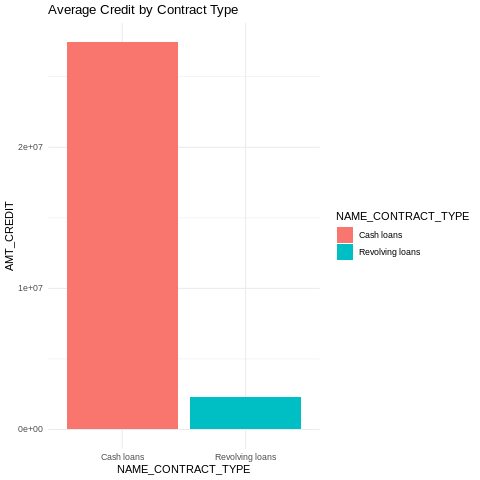

In [ ]:
%%R
library(ggplot2)
library(dplyr)

# Generate visualization
p <- ggplot(df_py_share, aes(x=NAME_CONTRACT_TYPE, y=AMT_CREDIT, fill=NAME_CONTRACT_TYPE)) +
  geom_bar(stat='identity') +
  ggtitle('Average Credit by Contract Type') +
  theme_minimal()
print(p)

In [ ]:
# We created a new feature named CREDIT_INCOME_RATIO in R and passing it to Python
df_py_mutated = %R df_py_share
print(df_py_mutated[['CREDIT_INCOME_RATIO']].head())


   CREDIT_INCOME_RATIO
0             2.007889
1             4.790750
2             2.000000
3             2.316167
4             4.222222


## R Creates Data- Python uses it

In [ ]:
%%R
# Create a sample dataframe (first 50 rows with no missing values)
r_sample <- r_data[, c('SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE',
                       'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                       'AMT_ANNUITY', 'NAME_INCOME_TYPE')]

In [ ]:
%%R
# Remove NAs for clean sharing
r_sample <- na.omit(r_sample)
r_sample

# A tibble: 307,499 × 7
   SK_ID_CURR TARGET NAME_CONTRACT_TYPE AMT_INCOME_TOTAL AMT_CREDIT AMT_ANNUITY
        <dbl>  <dbl> <chr>                         <dbl>      <dbl>       <dbl>
 1     100002      1 Cash loans                   202500    406598.      24700.
 2     100003      0 Cash loans                   270000   1293502.      35698.
 3     100004      0 Revolving loans               67500    135000        6750 
 4     100006      0 Cash loans                   135000    312682.      29686.
 5     100007      0 Cash loans                   121500    513000       21866.
 6     100008      0 Cash loans                    99000    490496.      27518.
 7     100009      0 Cash loans                   171000   1560726       41301 
 8     100010      0 Cash loans                   360000   1530000       42075 
 9     100011      0 Cash loans                   112500   1019610       33826.
10     100012      0 Revolving loans              135000    405000       20250 
# ℹ 307,489 more

In [ ]:
%%R
# Check sample
head(r_sample)

# A tibble: 6 × 7
  SK_ID_CURR TARGET NAME_CONTRACT_TYPE AMT_INCOME_TOTAL AMT_CREDIT AMT_ANNUITY
       <dbl>  <dbl> <chr>                         <dbl>      <dbl>       <dbl>
1     100002      1 Cash loans                   202500    406598.      24700.
2     100003      0 Cash loans                   270000   1293502.      35698.
3     100004      0 Revolving loans               67500    135000        6750 
4     100006      0 Cash loans                   135000    312682.      29686.
5     100007      0 Cash loans                   121500    513000       21866.
6     100008      0 Cash loans                    99000    490496.      27518.
# ℹ 1 more variable: NAME_INCOME_TYPE <chr>


## Share the dataframe with Python

In [ ]:
# Pull r_sample R DataFrame back into Python
# varname = %R r_varname pulls R variables back into Python.
r_sample_py = %R r_sample

# Preview in Python
print(r_sample_py.head())


   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  AMT_INCOME_TOTAL  AMT_CREDIT  \
1    100002.0     1.0         Cash loans          202500.0    406597.5   
2    100003.0     0.0         Cash loans          270000.0   1293502.5   
3    100004.0     0.0    Revolving loans           67500.0    135000.0   
4    100006.0     0.0         Cash loans          135000.0    312682.5   
5    100007.0     0.0         Cash loans          121500.0    513000.0   

   AMT_ANNUITY NAME_INCOME_TYPE  
1      24700.5          Working  
2      35698.5    State servant  
3       6750.0          Working  
4      29686.5          Working  
5      21865.5          Working  


# Best Practices and Conclusion:

**Best Practices:**
- Always use `.dropna()` or `na.omit()` before sharing data
- Use clear comments when sharing data (`%R -i`, `%R variable`)
- Preview data after each transfer to confirm structure
- Use R for complex visualizations, Python for ML pipelines

**Conclusion:**

You now know how to:
- Load real Kaggle data into Colab
- Share Python DataFrame to R
- Visualize with ggplot2 in R
- Create new R features and pull them back into Python